## Load in and plot data

In [1]:
from osgeo import gdal
from osgeo import ogr
import geopandas as gpd
import matplotlib.pyplot as plt

Sometimes geopandas can cause an error. To overcome this simply run the followign line and restart the kernel

In [2]:
# pip install --upgrade --force-reinstall shapely

Load the depth measurement data points

In [97]:
data_location = "Data/depth_samples.shp"
fen_outline = "Data/NCA_46_The_Fens.shp"

# import shapefile using geopandas
depth_measurements = gpd.read_file(data_location)
fen_outline = gpd.read_file(fen_outline)

Print a summary of the dataset (a geopandas table containing our data)

In [98]:
print(depth_measurements)

     FID     Location         Partner  \
0      1    Sedge Fen  National Trust   
1      2    Sedge Fen  National Trust   
2      3    Sedge Fen  National Trust   
3      4    Sedge Fen  National Trust   
4      5    Sedge Fen  National Trust   
..   ...          ...             ...   
166  167  Burwell Fen  National Trust   
167  168  Burwell Fen  National Trust   
168  169   Fen Ditton             BGS   
169  170     Hockwold             BGS   
170  171     West Row             BGS   

                                             Contact Sample Ide        Date  \
0                                   Jo Finlow - FEPP     SED 14  11/10/2022   
1                                   Jo Finlow - FEPP     SED 19  11/10/2022   
2                                   Jo Finlow - FEPP     SED 20  10/10/2022   
3                                   Jo Finlow - FEPP     SED 21  10/10/2022   
4                                   Jo Finlow - FEPP     SED 22  10/10/2022   
..                               

<AxesSubplot: >

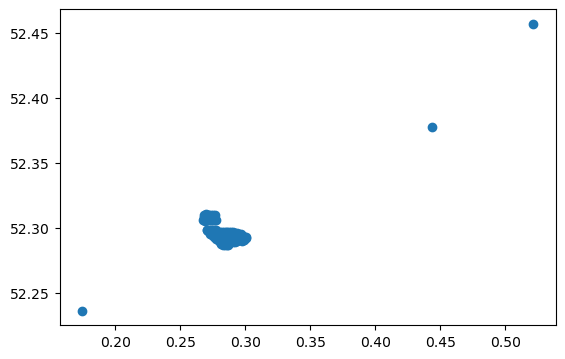

In [99]:
depth_measurements.plot()

Although the depth measurements are in a plottable format fen outline is not since it is a multipolygon. We will deal with the mismatch in projections first:

In [100]:
fen_outline = fen_outline.to_crs(depth_measurements.crs)

Now extract the geometry of the multipolygon data from the geopandas dataframe

In [112]:
geom = fen_outline['geometry'][0]

<AxesSubplot: >

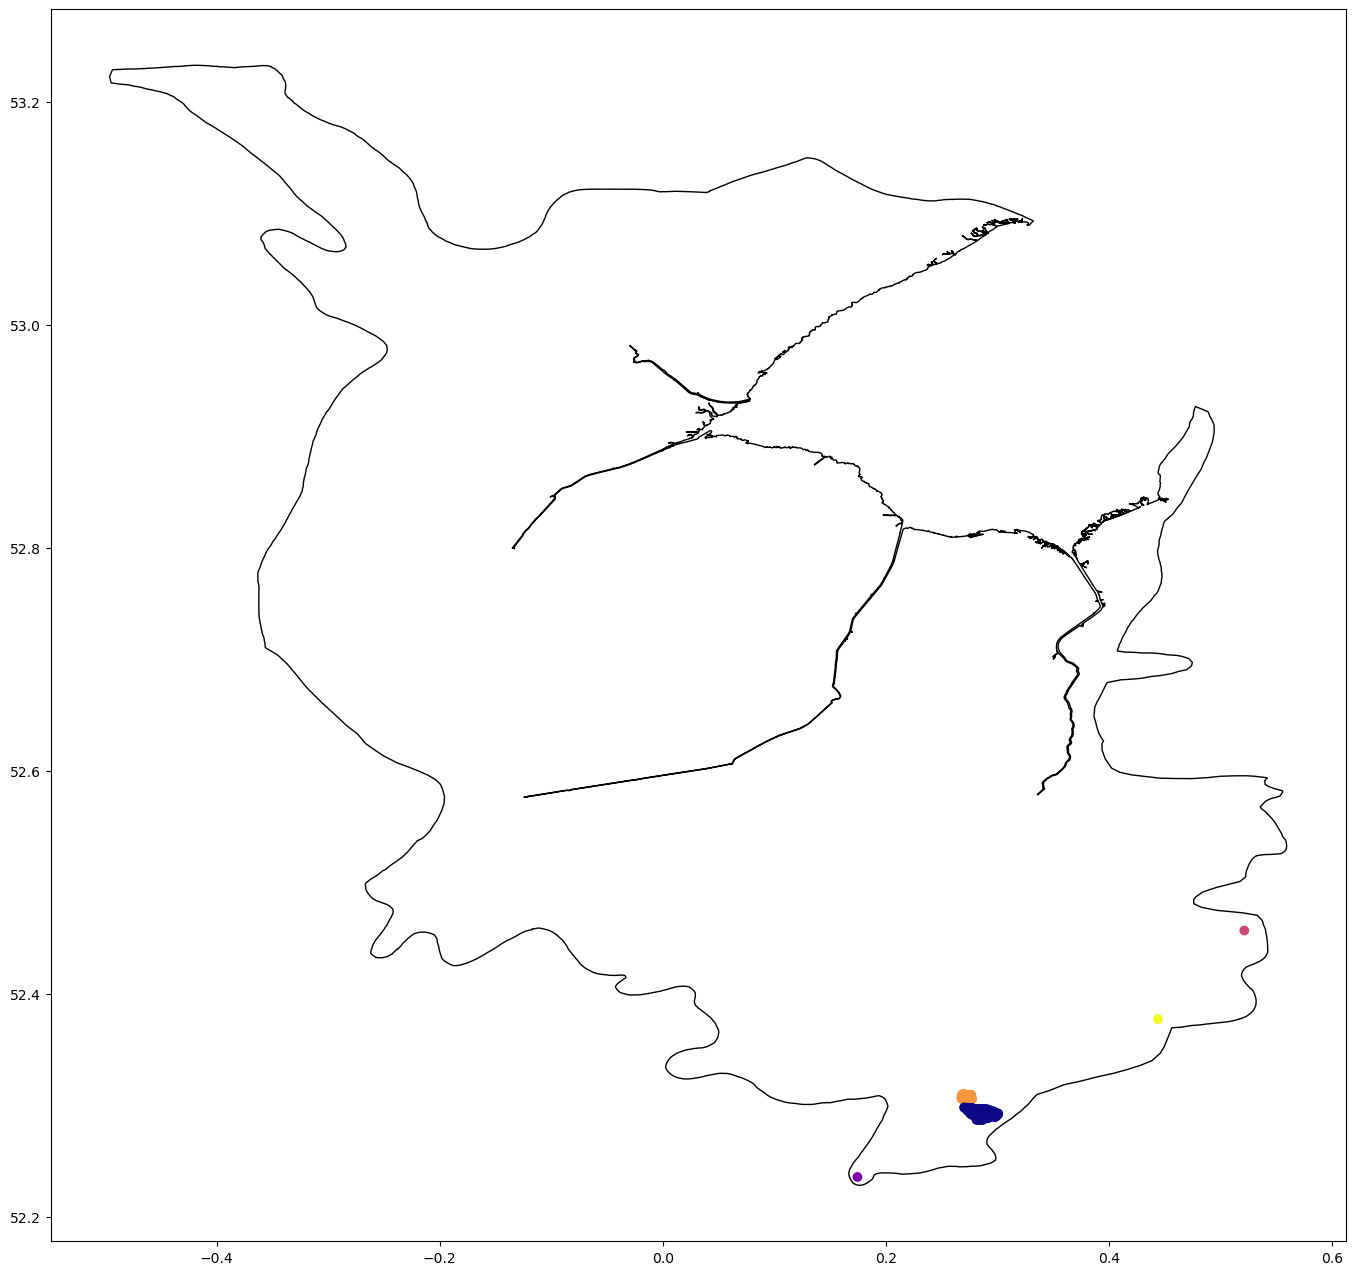

In [113]:
# Create the plot
fig, ax = plt.subplots(figsize = (20,16))

# Convert the Fens boundary to x/y points. Then fill inside as white and boundary as black
for item in geom.geoms:   
    xs, ys = item.exterior.xy  
    ax.fill(xs, ys, fc='w', ec='k')
    
# Plot the different locations in different colours     
depth_measurements.plot(column = 'Location', cmap = 'plasma', ax=ax)  

## Download 30m Sentinel tiles 

In [1]:
import ee

# Trigger the authentication flow.
#ee.Authenticate()

# Initialize the library.
ee.Initialize()

In [2]:
# Import the Landsat image collection. Use the corrected imagery that gives the true surface reflectance rather than 
# that which is receieved at the sensor (radiance) or at top of atmosphere (reflectance - sun factors e.g. azimuth 
# (for surface need to account for atmospheric factors also)
lc = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2")

In [3]:
lc.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'SR_B1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [9171, 9161],
   'crs': 'EPSG:32628',
   'crs_transform': [30, 0, 340185, 0, -30, 8808615]},
  {'id': 'SR_B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [9171, 9161],
   'crs': 'EPSG:32628',
   'crs_transform': [30, 0, 340185, 0, -30, 8808615]},
  {'id': 'SR_B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [9171, 9161],
   'crs': 'EPSG:32628',
   'crs_transform': [30, 0, 340185, 0, -30, 8808615]},
  {'id': 'SR_B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [9171, 9161],
   'crs': 'EPSG:32628',
   'crs_transform': [30, 0, 340185, 0, -30, 8808615]},
  {'id': 'SR_B5',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
 

In [4]:
# Selection of appropriate bands and dates for Landsat images 
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T1#bands

# Initial date of interest (inclusive).
i_date = '2021-01-01'

# Final date of interest (exclusive).
f_date = '2022-01-01'

lc_filter = lc.select('SR_B2', 'SR_B3', 'SR_B4').filterDate(i_date, f_date)

In [5]:
lc_filter.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'SR_B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7841, 8001],
   'crs': 'EPSG:32622',
   'crs_transform': [30, 0, 301785, 0, -30, 5375115]},
  {'id': 'SR_B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7841, 8001],
   'crs': 'EPSG:32622',
   'crs_transform': [30, 0, 301785, 0, -30, 5375115]},
  {'id': 'SR_B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7841, 8001],
   'crs': 'EPSG:32622',
   'crs_transform': [30, 0, 301785, 0, -30, 5375115]}],
 'id': 'LANDSAT/LC09/C02/T1_L2/LC09_001027_20211107',
 'version': 1644801548589175,
 'properties': {'DATA_SOURCE_ELEVATION': 'GLS2000',
  'WRS_TYPE': 2,
  'REFLECTANCE_ADD_BAND_1': -0.2,
  'REFLECTANCE_ADD_BAND_2': -0.2,
  'DATUM': 'WGS84',
  'REFLECTANCE_ADD_BAND_3': -0.2,
  'REFLECTANCE_ADD_BAND_4': 

In [6]:
# Check the timestamp on the first and last sample in our date range
firstimg = lc_filter.limit(1, 'system:time_start').first()
firstdate = ee.Date(firstimg.get('system:time_start'))
print(firstdate.format(None, 'GMT').getInfo())

2021-10-31T01:40:00


In [7]:
lastimg = lc_filter.limit(1, 'system:time_start', False).first()
lastdate = ee.Date(lastimg.get('system:time_start'))
print(lastdate.format(None, 'GMT').getInfo())

2021-12-31T22:48:11


To plot images from gee, we need to use Folium - which gives us an interactive map. We need to define a non-standard method which allows us to add gee layers on top of this interactive map

In [8]:
# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

We can use matplotlib to plot any tabular data we receive, but for raster data we will need to use folium

In [22]:
# Define the visualization parameters.
image_viz_params = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
}

# Define a map centered on San Francisco Bay.
map_18 = folium.Map(location=[52.298472, 0.270304], zoom_start=10)

# Add the image layer to the map and display it.
map_18.add_ee_layer(lastimg, image_viz_params, 'Landsat Imagery')
display(map_18)

In [23]:
# Get the data for the pixel intersecting the point in the Fens
u_lon = 0.270304
u_lat = 52.298472
u_poi = ee.Geometry.Point(u_lon, u_lat)
scale = 30 # scale in metres
roi = u_poi.buffer(1000)

# This gets the tiles that overlap with the point specified and returns the value at the point specified
lst_u_poi = lc_filter.getRegion(u_poi, scale)

# Since the getRegion command only turned up one tile from the date range that we filtered from, taking the mean of all
# the tiles before sampling from the resultant image should give the same result (since mean of 1 tile = tile): TRUE 
# Once taken the mean, we can then use sample since we have an image instead of image collection (set of tiles)
lst_2 = lc_filter.mean().sample(u_poi, scale).getInfo()

In [24]:
lst_u_poi

In [25]:
lst_2

{'type': 'FeatureCollection',
 'columns': {'SR_B2': 'Float<0.0, 65535.0>',
  'SR_B3': 'Float<0.0, 65535.0>',
  'SR_B4': 'Float<0.0, 65535.0>'},
 'properties': {'band_order': ['SR_B2', 'SR_B3', 'SR_B4']},
 'features': [{'type': 'Feature',
   'geometry': None,
   'id': '0',
   'properties': {'SR_B2': 8768.5, 'SR_B3': 10128, 'SR_B4': 9527}}]}

In [26]:
# Instead of getting the values of images at a given point, we want to limit the image collection to tiles that pass 
# through the point of interest only
# filters image collection based on intersection with geometry 
# filters based on dates
# filter bands
lc_spatially_limited = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
  .filterBounds(u_poi).filterDate('2021-01-01','2022-01-01').select('SR_B[2-4]')   

In [28]:
import geemap
Map = geemap.Map()

visParams = {
  'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
  'max': 65535*0.5,
  'min': 0,
};

Map.setCenter(0.270304, 52.298472, 19);
Map.addLayer(lc_spatially_limited.first(), visParams, 'Image representative');
Map

Map(center=[52.298472, 0.270304], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(…

In my view, this resolution of imagery seems a bit pointless. If we are hoping to understand the colour of patches and identify useful features such as rivers, channels etc then I'm convinced this will be of much use. Lets try Sentinel 2 to see if we can pick out features better. 

In [29]:
sen = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
sen.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'B1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [1830, 1830],
   'crs': 'EPSG:32635',
   'crs_transform': [60, 0, 499980, 0, -60, 3000000]},
  {'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32635',
   'crs_transform': [10, 0, 499980, 0, -10, 3000000]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32635',
   'crs_transform': [10, 0, 499980, 0, -10, 3000000]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32635',
   'crs_transform': [10, 0, 499980, 0, -10, 3000000]},
  {'id': 'B5',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min':

In [30]:
sen_spatially_limited = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED") \
  .filterBounds(u_poi).filterDate('2021-01-01','2022-01-01').select('B[2-4]')  

listOfImages = sen_spatially_limited.toList(sen_spatially_limited.size())

In [31]:
visParams = {
  'bands': ['B4', 'B3', 'B2'],
  'max': 3000,
  'min': 0,
};

Map.setCenter(0.270304, 52.298472, 19);
Map.addLayer(ee.Image(listOfImages.get(172)), visParams, 'Image representative');   #172 400 (whats in field changed? time of year are these?)
Map

Map(bottom=44153089.0, center=[52.298472, 0.270304], controls=(WidgetControl(options=['position', 'transparent…

In [32]:
time_400 = ee.Date(ee.Image(listOfImages.get(400)).get('system:time_start').getInfo())
print(time_400.format(None, 'GMT').getInfo())

2021-09-08T11:16:44


In [33]:
time_172 = ee.Date(ee.Image(listOfImages.get(172)).get('system:time_start').getInfo())
print(time_172.format(None, 'GMT').getInfo())

2021-04-18T11:06:42


I have checked other tiles and they all roughly are taken at 11am, which must be something to do with the satellite being on a constant orbit around that point. The two tiles that don't have cloud cover are taken in April and Septemeber, hence why the fields look quite different (vegetation for some and dirt for others). 

It might be an idea to experiment with the time of year and see how this influences our model's predictions? It might be that seeing bare soil gives colour information, but it might be that the colour of crops gives you an indication of wastage? If there is quite a big difference it might be worth including multiple times in the model to get all this information. 

## Try to sample 10x10 boxes around each pixel of interest

For a given point (the one we have used already), lets try and find: 
1. The value of the pixel located at that point. 
2. An image made of of n by n pixels, centred at the pixel where the sample was taken. 

In [34]:
# u_poi is point of interest 
# Lets use time=172 as the tile to do the process on 
sample = ee.Image(listOfImages.get(172)).sample(u_poi, 10)
first_feature = sample.first()
first_feature.getInfo().get('properties')

{'B2': 577, 'B3': 842, 'B4': 697}

In the GeoPython example, they filter the image collection by those covering point and temporal range, then sort on cloud cover and take the one with the highest percentage as the image tile to work with. They then make a training set based on this tile, using image.sample and specifying e.g. 500 pixel samples and then add this training set to the map to visualise. 

In [56]:
# Now we want to sample many pixels centred around this point 
def makeSquare(centrePoint, sideLength):
    
    # Need to convert this point to the other crs 
    centrePoint = centrePoint.transform('EPSG:32632')
    centreCoords = centrePoint.getInfo().get('coordinates')
    geometry = ee.Geometry.Rectangle(
              [centreCoords[0] - sideLength, 
               centreCoords[1] - sideLength,
               centreCoords[0] + sideLength, 
               centreCoords[1] + sideLength], 'EPSG:32632', False)

    return geometry

In [57]:
square = makeSquare(u_poi, 100)

In [54]:
ee.Geometry.Point(square.getInfo().get('coordinates')[0][0]).transform('EPSG:4326')

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Geometry.transform",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "GeometryConstructors.Point",
          "arguments": {
            "coordinates": {
              "constantValue": [
                5830104.57964856,
                -94817.74296202045
              ]
            }
          }
        }
      },
      "proj": {
        "functionInvocationValue": {
          "functionName": "Projection",
          "arguments": {
            "crs": {
              "constantValue": "EPSG:4326"
            }
          }
        }
      }
    }
  }
})

In [266]:
test = square.transform('EPSG:4326')

In [55]:
u_poi.transform('EPSG:32632')

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Geometry.transform",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "GeometryConstructors.Point",
          "arguments": {
            "coordinates": {
              "constantValue": [
                0.270304,
                52.298472
              ]
            }
          }
        }
      },
      "proj": {
        "functionInvocationValue": {
          "functionName": "Projection",
          "arguments": {
            "crs": {
              "constantValue": "EPSG:32632"
            }
          }
        }
      }
    }
  }
})

In [270]:
test

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Geometry.transform",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "GeometryConstructors.Rectangle",
          "arguments": {
            "coordinates": {
              "constantValue": [
                5830104.57964856,
                -94817.74296202045,
                5830304.57964856,
                -94617.74296202045
              ]
            },
            "crs": {
              "functionInvocationValue": {
                "functionName": "Projection",
                "arguments": {
                  "crs": {
                    "constantValue": "EPSG:32632"
                  }
                }
              }
            },
            "geodesic": {
              "constantValue": false
            }
          }
        }
      },
      "proj": {
        "functionInvocationValue": {
          "functionName": "Projection",
          "arguments": {
            "crs": {
              "constantValue": "EPSG:4326"
            }
          }
        }
      }
    }
  }
})

In [58]:
Map.setCenter(0.270304, 52.298472, 19);
Map.addLayer(square);   #172 400 (whats in field changed? time of year are these?)
Map

Map(bottom=44153089.0, center=[52.298472, 0.270304], controls=(WidgetControl(options=['position', 'transparent…

In [273]:
Map.clear()

Map(bottom=5636.0, center=[53.014783245859235, -5.042724609375001], crs={'name': 'EPSG3857', 'custom': False},…

Although this method hasn't worked wonders since the box doesn't align with the pixels, GEE does seem to provide some ML capabilities that don't require manual finding of a sub-image: 
1. Unsupervised classification - clustering of data in GEE using data layers. The idea is that if we provide the relevent layers of data then hopefully the algorithm can spot similarities and cluster points accordingly. This would in theory give e.g. no peat, peat and deep peat classes for example without needing labels. We can then use the labels we have to interpret/validate the model. 
2. Supervised classification (simple) - GEE also offers supervised classification methods that are based on things like random forests and linear regression. Again, since it is just classifying pixels directly (without looking at neighbours) there seem to be some fairly simple methods for doing this in GEE. NOTE: use "setOutputMode" to change type of classification to regression. 
3. Advanced AI/CNN - for the more advanced stuff they provide some examples using Google AI (cloud) and TensorFlow, including a CNN example. If we take a look at these notebooks we might be able to see how things are done and see if we can use similar approaches for either gathering training data/translating into PyTorch. 

We should also try and check out what the ML for peat papers used. Perhaps they provide a Github repo? Maybe we can find out if they used GEE and if they did how they got training samples etc. 